<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 3</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Juan Pablo Jorquera;201573533-6</h3>
    <h3 align="center">David Medel;201573548-4</h3>
    <h3 align="center">Diciembre de 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual y ser entregado el 31 de diciembre de 2019.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab3.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas, un README que indique la forma correcta de ejecutar su notebook y cualquier archivo/carpeta extra que considere necesario para el correcto funcionamiento de su tarea. El laboratorio puede ser trabajado tanto en lenguaje R como en python 3 (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.

**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**




## 1. Ley de Zipf y NLP (30p)


#### Zipf

La ley de Zipf corresponde a una ley empírica elaborada por George Kingsley Zipf, lingüista americano. Esta ley dice que la distribución de palabras en un texto es de libre escala. Este fenómeno se evidenció en el idioma inglés y, después, se expandió a todos los otros idiomas. Su popularidad es tal, que se tiende a asociar a Zipf con leyes de potencia más allá del ámbito lingüista, se habla de comportamiento "zipfiano".

Para trabajar con esta ley es necesario analizar texto/s de gran extensión, formalmente conocidos como corpus. En este caso, trabajarán con una selección de libros en formatos .txt [disponibles aqui](https://www.gutenberg.org/browse/scores/top). No es necesario que los descargue todos, mínimo 3, máximo una cantidad que su computador pueda procesar en un tiempo decente para usted.

> a) Con los libros que usted seleccionó haga un gráfico en el que se muestren las 10 palabras de mayor frecuencia. ¿Qué puede decir acerca de las palabras que aparecen? 

> b) Del universo de palabras que puede construir mediante el análisis de texto ¿Cuál es la probabilidad de que, al elegir al azar una de ellas, obtenga una palabra rara? **Palabra rara:** su frecuencia de aparición es 1.

> c) ¿Se podría establecer alguna relación entre la probabilidad de encontrar $N$ palabras raras (su frecuencia de aparición es 1) en función del largo del texto analizado? ¿Hay alguna relación con b)? Fundamente. Pruebe para 3-5 valores distintos de $N$.

*Hint: podría ir leyendo por partes y cada vez seleccionando partes de mayor o menor largo.*

Para clasificar un texto (asignarles palabras o temas claves) se necesitan utilizar palabras características. Utilizando la ley de zipf se tiene que los extremos de la distribución no son útiles. Las palabras más comunes estarían presentes en casi todos los textos y las menos frecuentes no estarían en ninguno.

> d) En base a lo anterior seleccione 2 palabras que usted utilizaría para clasificar los textos analizados (el conjunto entero). Para las dos palabras $(w_1,w_2)$ seleccionadas se plantea la siguiente pregunta ¿La ocurrencia de $w_1$ en un texto es independiente de la presencia de $w_2$ en el mismo texto?. Debido que la cantidad de libros podría no ser suficiente para mostrar esto, es posible considerar sub-secciones como "mismo texto", por ejemplo, los capítulos. 

* Usted debe hacer la partición útil de la distribución según su criterio. No use stopwords para $w_1,w_2$ (¿No sabe lo que es una stopword? [Pinche aqui](https://www.google.com/)). Los extremos no sirven así que deberá buscar en otra parte.
* Explique el prodecimiento que realizará para mostrar la independencia o no independencia de las palabras.

----

Es muy posible que su corpus no pueda ser adjuntado junto a su laboratorio. Debido a esto, debe referenciar el sitio de donde descargó su corpus en el README.

## Respuesta 

### Indicaciones generales

Inicialmente se listará los diez libros (y archivos) utilizados para trabajar para luego continuar trabajando parte por parte. Dichos libros fueron obtenidos del [proyecto gutenberg](https://www.gutenberg.org/browse/scores/top), se encuentran más detalles sobre los textos en el archivo `README.md`.

Para acelerar el proceso de ejecución, se adjunta el archivo "corpus.txt" con el cuerpo de dichos libros y realizando la limpieza de los textos para trabajar con palabras, además, se añadió el script para la generación del corpus en el archivo "armarCorpus.py". Cabe destacar que en dicho script, también se realizó una limpieza de los textos, para la consideración adecuada de palabras se eliminaron símbolos y se normalizó el texto a minúsculas. También se filtró texto que se incluía sobre información del sitio que se consideró irrelevante y formular el corpus puramente en base a los libros incluidos. Es posible que no se hayan filtrado todos los casos deseables, pero se estima que dichos casos son ínfimos con respecto al tamaño de los textos.

In [100]:
# Incluir librerías a utilizar a lo largo del informe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import re
import string

### Parte 1.a)

> a) Con los libros que usted seleccionó haga un gráfico en el que se muestren las 10 palabras de mayor frecuencia. ¿Qué puede decir acerca de las palabras que aparecen? 

Para ello se contabilizara cada palabra en el corpus con su respectiva frecuencia y en base a ello se generará el gráfico requerido. Cabe destacar que en dicho corpus se trabajó con los 10 libros seleccionados para simular un libro más grande.

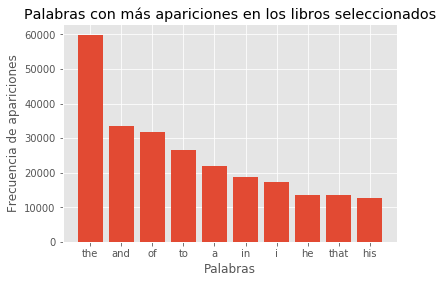

In [101]:
# Función para realizar conteo de palabras y frecuencias
def conteoPalabras(nombreArchivo):
    nLineas = 0
    nPalabras = 0
    cuenta_palabras = dict()
    corpus = open('./'+nombreArchivo, 'r')
    for linea in corpus:
        nLineas += 1
        for palabra in linea.split():
            nPalabras += 1
            # Contabilizar palabras
            if palabra in cuenta_palabras:
                cuenta_palabras[palabra] += 1
            else:
                cuenta_palabras[palabra] = 1
    corpus.close()
    return cuenta_palabras, nLineas, nPalabras

# Armar dataframe resultado
cuenta_palabras, nLineas, nPalabras = conteoPalabras('corpus.txt')
df = pd.DataFrame(list(cuenta_palabras.items()), columns=('palabra', 'frecuencia'))
df.sort_values(by=['frecuencia'], ascending=False, inplace=True)

# Graficar
style.use('ggplot')
plt.bar(df.head(10)['palabra'].tolist(), df.head(10)['frecuencia'].tolist(), align='center')
plt.title('Palabras con más apariciones en los libros seleccionados')
plt.ylabel('Frecuencia de apariciones')
plt.xlabel('Palabras')
plt.show()

Sobre las palabras podemos decir que las que más se repiten son artículos o pronombres, es decir, palabras que se utilizan para componer oraciones por sobre palabras que conlleven contenido (stopwords).

### Parte 1.b)

> b) Del universo de palabras que puede construir mediante el análisis de texto ¿Cuál es la probabilidad de que, al elegir al azar una de ellas, obtenga una palabra rara? **Palabra rara:** su frecuencia de aparición es 1.

En base al conteo realizado en a), se calculará la probabilidad en base a los casos favorables (cantidad de palabras raras) y casos posibles (total de palabras).

In [102]:
cuenta_rara = 0
total = 0
# Realizar conteo de palabras raras y palabras totales
for palabra in cuenta_palabras:
    cuenta_pal_actual = cuenta_palabras[palabra]
    if cuenta_pal_actual == 1:
        cuenta_rara += 1
    total += cuenta_pal_actual
probabilidad = round(cuenta_rara/total, 5)
print('La probabilidad de obtener una palabra rara es de: ', probabilidad)

La probabilidad de obtener una palabra rara es de:  0.01917


Como se puede ver, hay una muy baja probabilidad de obtener una palabra rara con aproximadamente un 1,92%; lo que concuerda con el crecimiento de libre escala, en donde las palabras más comunes crecen más, aislando las palabras raras.

### Parte 1.c)

> c) ¿Se podría establecer alguna relación entre la probabilidad de encontrar $N$ palabras raras (su frecuencia de aparición es 1) en función del largo del texto analizado? ¿Hay alguna relación con b)? Fundamente. Pruebe para 3-5 valores distintos de $N$.

Para ello se dividirá el texto en tamaños de distinto largo (según la cantidad de palabras) y cinco $N$ arbitrarios, se contará las palabras raras del texto y así verificar si se logra encontrar al menos $N$ palabras raras, para luego obtener la probabilidad según lo éxitos obtenidos en cada parte y el total de las partes. Con dichos valores: los largos utilizados y la probabilidad encontrada se buscará el coeficiente de correlación de Pearson para determinar la existencia de relación entre ambas variables.

Cantidad de palabras del corpus original:  1066892


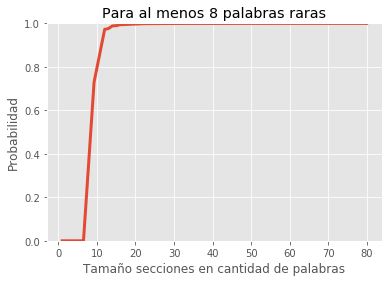

Resultando en un coeficiente de correlación de:  0.4877


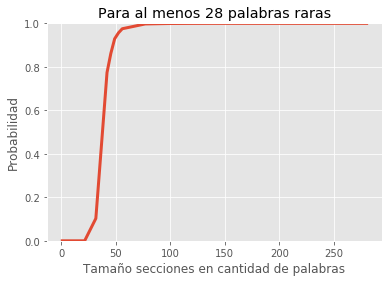

Resultando en un coeficiente de correlación de:  0.5845


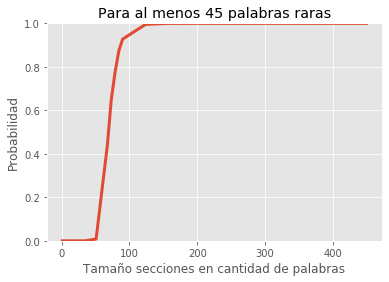

Resultando en un coeficiente de correlación de:  0.6762


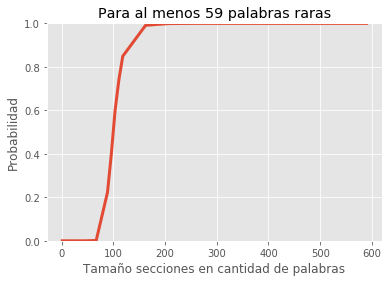

Resultando en un coeficiente de correlación de:  0.7348


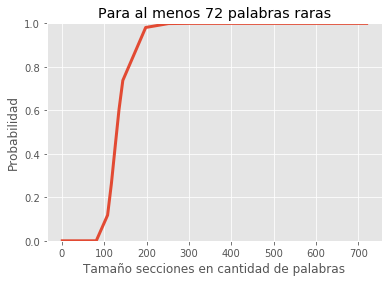

Resultando en un coeficiente de correlación de:  0.774


In [103]:
print("Cantidad de palabras del corpus original: ", nPalabras)

# Función para contar palabras y frecuencias según cierto tamaño de secciones
# en cantidad de palabras
def cuentaPalabras(tamPalabras):
    cuenta_parte = dict()
    palabrasLeidas = 0
    cantidad_raras = list()
    corpus = open('./corpus.txt', 'r')
    for linea in corpus:
        for palabra in linea.split():
            # Contabilizar palabras
            if palabra in cuenta_parte:
                cuenta_parte[palabra] += 1
            else:
                cuenta_parte[palabra] = 1
            palabrasLeidas += 1
            # Finalizar revisión parte actual
            if palabrasLeidas == (tamPalabras):
                cuenta_rara = 0
                # Conteo palabras raras
                for palabra in cuenta_parte:
                    cuenta_pal_actual = cuenta_parte[palabra]
                    if cuenta_pal_actual == 1:
                        cuenta_rara += 1
                # Calcular resultado
                cantidad_raras.append(cuenta_rara)
                # Resetear variables
                cuenta_parte.clear()
                palabrasLeidas = 0
    corpus.close()
    df_probs = pd.DataFrame(cantidad_raras, columns = ['nRaras'])
    return df_probs

# Función para contabilizar las palabras raras según al menos n, también
# genera los resultados
def analizarN(n):
    # Selección de tamaño en función del N
    # Tramos de tamaño [1, 150%]; [150%, 200%]; [200%, 500%]; [500%, 10000%] de N
    rango1 = np.linspace(1, 1.5*n, 5)
    rango2 = np.linspace(1.5*n, 2*n, 5)
    rango3 = np.linspace(2*n, 5*n, 5)
    rango4 = np.linspace(5*n, 10*n, 5)
    largoPartesEnPalabras = np.concatenate((rango1, rango2, rango3, rango4))
    probabilidades = []
    # Cálculos en distintos largos
    for largo in largoPartesEnPalabras:
        # Contar palabras
        df_aux = cuentaPalabras(int(largo))
        # Analizar exitos
        df_aux2 = df_aux['nRaras'].apply(lambda x: 0 if x<n else 1)#x/largo)
        # Calcular promedio total para al menos n palabras raras
        exitos = df_aux2.sum()
        nPartes = df_aux2.count()
        probabilidades.append(exitos/nPartes)
    # Graficar
    plt.plot(largoPartesEnPalabras, probabilidades, linewidth=3)
    axes = plt.gca()
    axes.set_ylim([0, 1])
    plt.title('Para al menos '+str(n)+' palabras raras')
    plt.xlabel('Tamaño secciones en cantidad de palabras')
    plt.ylabel('Probabilidad')
    plt.show()
    # Cálculo coef correlacion
    correlacion = np.corrcoef(largoPartesEnPalabras, probabilidades)
    print('Resultando en un coeficiente de correlación de: ', round(correlacion[0][1],4))
    probabilidades.clear()

# Analizar para distintos n
nPalabrasRaras = [8, 28, 45, 59, 72]
for n in nPalabrasRaras:
    analizarN(n)

Es importante discutir en primer lugar sobre las diferencias de los gráficos. Éstas se generan principalmente debido a la importancia de los $N$ y los tamaños escogidos, según el crecimiento de los gráficos y la evidencia encontrada después de cierto tamaño de las partes leídas se garantiza que siempre se encontrará al menos $N$ palabras raras y los gráficos se mantienen constantes. Es por ello que no tiene sentido comparar gráficos de la misma escala, ya que los tamaños a utilizar son útiles para el orden de cada $N$ específico. Para dicho proósito se escogieron tamaños en función de cierto porcentaje de $N$.

En base a los coeficientes de correlación obtenidos, existe una relación positiva entre el tamaño de las partes escogidas y la probabilidad de encontrar $N$ palabras raras, es decir, si se busca en secciones más grandes, en más probable encontrar al menos $N$ palabras raras. Además, para mayor $N$, se necesitan tomar secciones de tamaño más grande para obtener mayores probabilidades.

Si comparamos con b), se puede notar que son casos distintos, ya que en la pregunta b), se está evaluando la proporción de cantidad de palabras raras con respecto al total, lo que depende directamente de la frecuencia de las palabras no raras y que aumentan más su frecuencia al leer más palabras. Por otro lado, en la pregunta c), se relaciona la cantidad de palabras raras con respecto al largo del texto elegido, es decir, para este caso no afecta en mayor grado las palabras que no sean raras. Así, al aumentar el tamaño de lectura del corpus, es probable que los éxitos (cantidad de palabras raras) aumenten, a diferencia de b). 

Si lo vemos como un grafo (disjunto) en el cual los nodos son las palabras y los nodos nuevos se van uniendo a las palabras iguales, el tamaño de cada subgrafo representaría a la frecuencia. En este caso, esta pregunta estaría asociada a agregar nodos, donde es más probable unirlos a los de mayor frecuencia y ahí ver si aumentan los nodos aislados. Por otro lado, b) corresponde simplemente a seleccionar un nodo aislado del grafo siendo que son amplia minoría.

### Parte 1.d)
> d) En base a lo anterior seleccione 2 palabras que usted utilizaría para clasificar los textos analizados (el conjunto entero). Para las dos palabras $(w_1,w_2)$ seleccionadas se plantea la siguiente pregunta ¿La ocurrencia de $w_1$ en un texto es independiente de la presencia de $w_2$ en el mismo texto?. Debido que la cantidad de libros podría no ser suficiente para mostrar esto, es posible considerar sub-secciones como "mismo texto", por ejemplo, los capítulos. 

Para ello se trabajará en dos partes: en primer lugar se estudiará las palabras y sus frecuencias para poder elegir adecuadamente las dos palabras a estudiar y luego se realizará un análisis de sus apariciones para poder determinar la dependencia o independencia entre ellas.

Para el estudio de la frecuencia y siguiendo lo formulado en la parte 1.a), se graficará las palabras de mayor a menor frecuencia en el corpus utilizado para evidenciar la tendencia que se genera entre ellas. Para dicho efecto se utilizará como métrica el ranking de frecuencias, en donde se le asigna una posición absoluta a las palabras partiendo por las de mayor frecuencia.

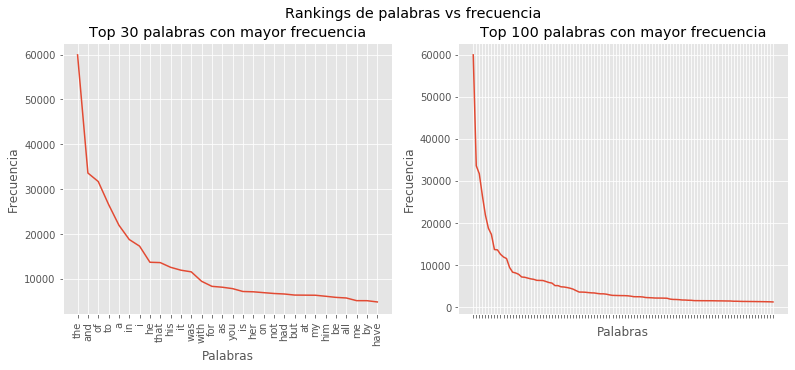

In [104]:
# Incluir ranking
df_ranking = df
df_ranking['ranking'] = df_ranking['frecuencia'].rank(ascending=False)

# Gráficos ranking vs frecuencia
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
fig.suptitle("Rankings de palabras vs frecuencia", fontsize="x-large")

# Gráfico ranking frecuencia top 30
df_top = df_ranking[(df_ranking.ranking <= 30)]
plt.subplot(1, 2, 1)
plt.plot(df_top.palabra, df_top.frecuencia)
plt.xticks(rotation='vertical')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 30 palabras con mayor frecuencia')

# Gráfico ranking frecuencia top 100
df_top = df_ranking[(df_ranking.ranking <= 100)]
plt.subplot(1, 2, 2, xticklabels=[])
plt.plot(df_top.palabra, df_top.frecuencia)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 100 palabras con mayor frecuencia')
plt.show()

Se comenzó con el gráfico de la izquierda donde se muestran treinta palabras para visualizar aquellas con mayor frecuencia. Por otro lado, en el gráfico de la derecha se puede visualizar mejor la tendencia, en donde se demuestra una relación inversa entre el ranking y la frecuencia de cada palabra. Para mostrar adecuadamente la relación y la ley de zipf, a continuación se mostrará el dataset entero en escala logarítmica para demostrar la relación de decaimiento según los órdenes de magnitud.

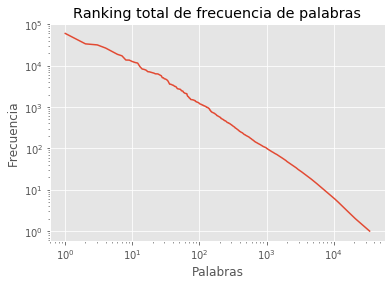

In [105]:
# Gráfico ranking frecuencia ajustado
plt.plot(df_ranking.ranking, df_ranking.frecuencia)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Ranking total de frecuencia de palabras')
plt.show()

Visualizando los gráficos anteriores se puede notar que aquellas palabras con frecuencia más alta corresponden a stopwords comunes. A su vez, al extremo derecho del gráfico se sitúan las palabras raras, ninguno de los dos casos resulta útil para el estudio, ya que no sirven para caracterizar los textos a los que pertenecen. Es por esto que para continuar trabajando se filtrarán las palabras fuera del IQR del ranking, a su vez se usó un [listado de stopwords](http://xpo6.com/list-of-english-stop-words/) para filtrar posibles stopwords que hayan quedado dentro del rango debido a posibles errores como el tamaño del dataset. De igual forma se filtrarán palabras de una letra que hayan quedado de la limpieza de símbolos y finalmente se elegirán dos palabras al azar para analizar su dependencia.

In [106]:
np.random.seed(524)

# Filtrar IQR
df_filtrado = df_ranking.groupby(by='ranking').size().reset_index(name='counts')
p25 = df_filtrado.ranking.quantile(0.25)
p75 = df_filtrado.ranking.quantile(0.75)
df_filtrado = df_ranking[(df_ranking.ranking >= p25) & (df_ranking.ranking <= p75)]
# Filtrar stopwords
stopword_list = pd.read_csv('stop-word-list.csv', header=None, index_col=False)
stopword_list = stopword_list.transpose()
stopword_list = stopword_list[0].apply(lambda x: x.strip()).values.tolist()
df_filtrado = df_filtrado[df_filtrado.palabra.apply(lambda x: x not in stopword_list)]
# Filtrar basura
df_filtrado = df_filtrado[df_filtrado.palabra.str.len() > 1]
# Sacar muestra y palabras al azar a utilizar
selected = df_filtrado.sample(2)#.palabra.values
palabra1, palabra2 = selected.palabra.values[0], selected.palabra.values[1]
frec1, frec2 = selected.frecuencia.values[0], selected.frecuencia.values[1]
print("Las palabras obtenidas son:", palabra1, "y", palabra2, 
      "con frecuencias de:", frec1, "y", frec2, "respectivamente.")

Las palabras obtenidas son: sleep y remember con frecuencias de: 352 y 221 respectivamente.


Para continuar, se trabajara con las siguientes variables aleatorias:
* x = frecuencia 'sleep'
* y = frecuencia 'remember'

Así, para tener una caracterización de las partes, el corpus se dividirá en 120 partes de igual tamaño. Entonces, se busca la probabilidad de cada frecuencia posible para ambas palabras, así obtendremos las probabilidades para cada combinación de frecuencias entre ambas palabras y, a su vez, la marginal de cada palabra según su propia frecuencia.

Al tener las probabilidades marginales de ambas palabras, calcularemos la multiplicación entre las posibles frecuencias de ambas palabras y así poder comparar los resultados con los antes obtenidos.

In [107]:
# Función para contar las apariciones de las palabras especificadas en cada subdivisión del corpus
def cuentaEspecifica(tamPalabras, palabra1, palabra2):
    cuenta_total = list()
    cuenta_parte = {palabra1: 0, palabra2: 0}
    palabrasLeidas = 0
    nParte = 1
    corpus = open('./corpus.txt', 'r')
    for linea in corpus:
        for palabra in linea.split():
            # Contabilizar palabras
            if palabra == palabra1:
                cuenta_parte[palabra1] += 1
            elif palabra == palabra2:
                cuenta_parte[palabra2] += 1
            palabrasLeidas += 1
            # Finalizar revisión parte actual
            if palabrasLeidas == (tamPalabras):
                # Guardar resultado
                copia_parte = cuenta_parte.copy()
                cuenta_total.append(copia_parte)
                # Resetear variables
                cuenta_parte.clear()
                cuenta_parte = {palabra1: 0, palabra2: 0}
                palabrasLeidas = 0
                nParte += 1
    corpus.close()
    return cuenta_total

## Búsqueda de palabras

# Cálculo de tamaño según divisiones
nDivisiones = 120
tamDivisiones = int(nPalabras/nDivisiones)
resultados = cuentaEspecifica(tamDivisiones, palabra1, palabra2)

# Muestra de resultados
indices = ['parte '+str(elem) for elem in list(range(1, len(resultados)+1))]
df_res = pd.DataFrame(resultados, index=indices)

# DF fdp multivariada
df_conjunto = df_res.groupby(by=[palabra1, palabra2]).size().reset_index(name="frecuencia")
df_conjunto['prob'] = round(df_conjunto.frecuencia/nDivisiones, 4)

# DF fdp marginal palabra 1
df_pal1 = df_res.groupby(by=[palabra1]).size().reset_index(name="frecuencia")
df_pal1['prob'] = round(df_pal1.frecuencia/nDivisiones , 4)

# DF fdp marginal palabra 2
df_pal2 = df_res.groupby(by=[palabra2]).size().reset_index(name="frecuencia")
df_pal2['prob'] = round(df_pal2.frecuencia/nDivisiones , 4)

# Formular dataframe con fdp multivariada
# Llenar etiquetas filas y columnas
df_fdp = pd.DataFrame(index = df_pal1[palabra1].values, columns = df_pal2[palabra2].values)
df_pal1[palabra1].values
df_pal2[palabra2].values
df_fdp.fillna(0, inplace=True)
df_fdp = df_fdp.astype(float)
# Llenar datos
for index, row in df_conjunto.iterrows():
    i, j = row[0], row[1]
    prob = row[3]
    df_fdp[j][i] = prob
df_fdp.rename_axis(index=['x'], columns=['y'], inplace=True)

# Llenado de filas, columnas con marginales
df_fdp['marginal'] = df_pal1.prob
for index, row in df_pal1.iterrows():
    fila = row[0]
    prob = row[2]
    df_fdp['marginal'][fila] = prob
df_fdp.loc['marginal'] = df_pal2.prob
for index, row in df_pal2.iterrows():
    col = row[0]
    prob = row[2]
    df_fdp[col]['marginal'] = prob

# Limpieza resultado
df_fdp = df_fdp.astype(str)
df_fdp['marginal']['marginal'] = ''
df_fdp.replace('0.0', '0', inplace=True)

print('\nFunción de probabilidad conjunta x, y; incluyendo marginales (valores aproximados):\n')
display(df_fdp)

# Formulación de multiplicación de marginales
df_marginales = df_fdp.copy()
df_marginales.drop('marginal', axis=0, inplace=True)
df_marginales.drop('marginal', axis=1, inplace=True)
for index, row in df_pal1.iterrows():
    fila = row[0]
    prob_i = row[2]
    for index, col in df_pal2.iterrows():
        columna = col[0]
        prob_j = col[2]
        df_marginales[columna][fila] = round(prob_i * prob_j, 5)

print('\nProducto probabilidades marginales para cada x, y:\n')
df_marginales


Función de probabilidad conjunta x, y; incluyendo marginales (valores aproximados):



y,0,1,2,3,4,5,6,7,8,9,marginal
x,,,,,,,,,,,
0,0.1083,0.0583,0.0833,0.025,0,0,0,0,0.0083,0.0083,0.2917
1,0.0667,0.1,0.025,0.0167,0.0083,0.0083,0.0083,0.0083,0.0083,0,0.25
2,0.025,0.05,0.0417,0.0167,0.0083,0,0.0083,0,0,0,0.15
3,0.0167,0.0167,0.0083,0.0167,0.0083,0.0167,0,0,0,0,0.0833
4,0.025,0.0167,0.0083,0,0,0.0083,0,0,0,0,0.0583
5,0,0,0.0083,0,0,0,0,0,0,0,0.0083
6,0,0,0.0083,0.0083,0,0.0167,0,0,0,0,0.0333
7,0.0083,0,0.0083,0,0,0,0.0083,0,0,0,0.025
8,0,0.0083,0,0,0.0083,0,0,0,0,0,0.0167



Producto probabilidades marginales para cada x, y:



y,0,1,2,3,4,5,6,7,8,9
x,,,,,,,,,,
0,0.0778,0.08264,0.06076,0.0243,0.01216,0.01458,0.00729,0.00487,0.00487,0.00242
1,0.06668,0.07082,0.05208,0.02082,0.01042,0.0125,0.00625,0.00418,0.00418,0.00208
2,0.04,0.0425,0.03124,0.0125,0.00626,0.0075,0.00375,0.0025,0.0025,0.00124
3,0.02222,0.0236,0.01735,0.00694,0.00347,0.00417,0.00208,0.00139,0.00139,0.00069
4,0.01555,0.01652,0.01214,0.00486,0.00243,0.00292,0.00146,0.00097,0.00097,0.00048
5,0.00221,0.00235,0.00173,0.00069,0.00035,0.00042,0.00021,0.00014,0.00014,7e-05
6,0.00888,0.00943,0.00694,0.00277,0.00139,0.00167,0.00083,0.00056,0.00056,0.00028
7,0.00667,0.00708,0.00521,0.00208,0.00104,0.00125,0.00063,0.00042,0.00042,0.00021
8,0.00445,0.00473,0.00348,0.00139,0.0007,0.00084,0.00042,0.00028,0.00028,0.00014


Finalmente, se puede comprobar inicialmente que en la primera matriz que en general al cambiar el valor de y, se obtienen distintas distribuciones para x, por lo que inicialmente no serían independientes.

Según la definición de independencia, esto ocurre sí y solo sí: $f(x_i, y_j) = f_x(x_i) \cdot f_y(y_j), \forall x_i, y_j$ en el dominio. Pero, viendo los resultados de la primera y segunda matriz, queda claro que aquello no se cumple para todos los valores, por lo que la ocurrencia de 'sleep' y 'remember' no son independientes.

# 2. MCMC Decryption (40p)

La seguridad es un tema que desde tiempos inmemoriables ha sido utilizado en el envío de mensajes. Desde el *shift* de letras en $x$ posiciones hasta algoritmos complejos de encriptación que tienen a los computadores años intentando descifrarlos. Uno de los algoritmos utilizados para encriptar corresponde al de sustitución. Este algoritmo consiste en tener un hash con los pares (llave, valor) donde la letra que corresponde a la llave se reemplaza por la letra que corresponda a valor. Por ejemplo: 


```Python

Llave = "ITBLPHWZAREJXNFVOUDMCGYKQS"

Mensaje_Original = "Hola ¿qué tal?"

Mensaje_Encriptado = "ZFJI OCP MIJ"  #(notar que se ignoró puntuación y tilde)

Llave_Desencriptacion = "ICUSKOVFALXDTNQEYJZBRPGMWH"

```


#### ¿Cómo interpretar la llave? 

Dada una llave de la forma $x_{1}x_{2}x_{3}\dots x_{n}$ con $n$ largo del alfabeto inglés (A hasta Z sin Ñ)
la primera letra reemplazará a la "A", la segunda a "B", la tercera a "C" y así hasta la "Z". 

**Ejemplo pequeño:** 

"ABCD" lo encriptaré con la siguiente llave "CADB", la llave para desencriptar el mensaje es la siguiente "BDAC".

1. Encripto "CADA" con "CADB" $\rightarrow$ "DCBC"
2. Descencripto "DCBC" con "BDAC" $\rightarrow$ "CADA"

Esta será la nomenclatura que se utilizará al momento de presentar las llaves. 

#### Problema

A usted le han entregado un texto encriptado mediante sustitución, pero no conoce la llave que se utilizó originalmente para encriptarlo. Un enfoque fuerza bruta para descifrarlo implica que usted probará las $26!$ posibles combinaciones para desencriptar el texto. Claramente, probar semejante cantidad lo tendrá esperando una respuesta hasta mucho después de la fecha de entrega del laboratorio. 

Para resolver este problema se le plantea un método muy útil para resolver este problema en un tiempo mucho más prudente: cadenas de Markov con el método de Montecarlo (MCMC). El procedimiento es el siguiente: 

##### 1. Analizar Texto del idioma original

Es necesario tener una noción de la estructura del lenguaje origen del mensaje. Descifrar un mensaje en chino (5000 caractes que se utilizan en la vida diaria aprox) o descifrar un mensaje en inglés (26 letras solamente) no
utilizarán el mismo criterio para detectar estructura. 

En este caso trabajará con el idioma inglés y deberá buscar un texto en inglés bastante extenso (Corpus) o compilado de textos extensos para analizar las frecuencias. Para el idioma inglés se sugiere contar las frecuencias de a pares de caracteres, solamente utilice las 26 letras y el espacio " " para contar frecuencias.
Por ejemplo: "AH"," A", "A ", "BA", (el orden de aparición si importa en este caso). 

Recuerde que para los lenguajes de programación "a" y "A" no son lo mismo, pero para efectos del desencriptado sí.

#### 2. Métrica de Desempeño 

El método que se propone consiste en probar llaves de desencriptación aleatorias. Si no se define una forma para comparar una propuesta de otra, se tendrá el mismo proceso que el de probar todas las posibilidades hasta achuntarle. Se creará una métrica de desempeño que asigne un puntaje a cierta llave para ir optando por llaves que tiendan a un mayor puntaje.

La métrica que se sugiere es:

$$
 Puntaje = \prod Frecs("Par")^{Ocurrencias("Par")}
$$

Donde "Frecs("Par")" corresponde a la frecuencia del par ("AH" por ejemplo) en el análisis de texto realizado en el paso 1 y "Ocurrencias("Par")" corresponde a la frecuencia de dicho par **en el texto desencriptado con la llave propuesta**. Para facilitar los cálculos es recomendable utilizar $log(Puntaje)$ como métrica final. La métrica sugerida es proporcional a la máxima verosimilitud.

#### 3. Decisiones 

Para decidir si nos quedaremos con la solución actual o la solución propuesta haremos lo siguiente: 

* Si el puntaje de la solución actual es menor que el de la solución propuesta, nuestra propuesta actual será actualizada por la solución propuesta para la siguiente iteración. 

* Si el puntaje de la solución actual es mayor que el de la solución propuesta, se tirará una moneda cuya probabilidad de **cara** sea $\frac{Score\,Propuesta}{Score\,Actual}$, si sale cara optaremos por la solución propuesta.

#### 4. Procedimiento 

1. Elegimos alguna llave para desencriptar inicial, la que se quiera.
2. La llave propuesta será una variación de la llave actual permutando 2 elementos de ésta. 
3. Se toman las decisiones como el punto "Decisiones" indica. 
4. Repetir 2 y 3 varias veces. Se recomienda iterar 10000 veces o mas.
5. Terminadas las iteraciones se retornar el texto desencriptado junto a la llave de desencriptación.

>**Importante:** Es posible que al desencriptar el mensaje su resultado final no parezca tener sentido aunque
tenga todo bien programado. Esto es debido al azar así que corra su algoritmo unas cuantas veces si el primer
resultado no parece tener sentido antes de corregir el código. (En mis intentos, por lo general unas 3-5 veces era suficiente si no funcionaba a la primera). 


* Los textos encriptados que se le han facilitado se encuentran en el archivo "cifrados.txt"
* Los textos 1, 2 y 3 fueron encriptados utilizando la misma llave.
* El texto 4 es el mismo mensaje del texto 1 pero encriptado con otra llave.
* El texto 2 fue escrito originalmente en español (se reemplazó Ñ por N para mantener el tamaño del alfabeto) y los textos 1, 3 y 4 en inglés.

>a) Analice la métrica de desempeño y explique lo que intenta lograr ¿Qué es lo que se premia? 

>b) Desencripte el texto 1 utilizando el método explicado. 

>c) Desencripte el texto 2 utilizando el método explicado y el **análisis de texto en inglés**. De lo que obtuvo ¿Qué puede decir acerca de desencriptar un lenguaje distinto del analizado? ¿Qué puede decir acerca de la estructura de ambos lenguajes?

>d) Desencripte el texto 3 utilizando el método explicado. *Hint: Texto 1*.

>e) Desencripte el texto 4 utilizando el método explicado. Compare con lo obtenido en b) ¿La llave que se utiliza para encriptar tiene importancia en el resultado?

>f) ¿A qué se debe que al correr varias veces su algoritmo se pueda obtener un mensaje entendible, pero con distintas llaves de desencriptación? ¿Qué puede decir acerca del método, es determinista o estocástico? 

>g) **Bonus +5** Plantee una estrategia para desencriptar el texto 2 que está en español. Obtendrá otros 5 puntos si logra desencriptarlo, pero recuerde que la Ñ se reemplazó por N.

---
Es posible que al descifrar le quede un mensaje con pequeños errores, por ejemplo, "HSTO NO CONCUHRDA", si este es su caso, puede intentar sacar el mensaje original haciendo estas correcciones a mano. 

---

**Desarrollo 2**


In [108]:
import random
import numpy as np
import math
from time import time

#Almacenamos los textos en 4 diferentes listas
archivo = open('cifrados.txt', 'r')
texto_1 =[]
texto_2 =[]
texto_3 =[]
texto_4 =[]
for linea in archivo:
    linea = linea.strip()
    if linea == "Texto 1":
        linea= archivo.readline()
        texto_1.append(linea.strip())
    if linea == "Texto 2":
        linea = archivo.readline()
        texto_2.append(linea.strip())
    if linea == "Texto 3":
        linea = archivo.readline()
        texto_3.append(linea.strip())
    if linea == "Texto 4":
        linea = archivo.readline()
        texto_4.append(linea.strip())
archivo.close()      

#Función que crea llave al azar
def crear_llave():
    abecedario = 'abcdefghijklmnopqrstuvwxyz'
    desordenar = random.sample(abecedario, len(abecedario))
    palabra = ''.join(desordenar)
    return palabra

#Función obtiene una nueva llave según el enunciado
def cambiar_llave(llave_actual):
    llave=[]
    for i in llave_actual:
        llave.append(i)
        
    x= random.randint(0,len(llave_actual)-1)
    y= random.randint(0,len(llave_actual)-1)
    
    while(x==y):
        y= random.randint(0,len(llave_actual)-1)
    llave[x]= llave_actual[y]
    llave[y]= llave_actual[x]
    nueva_palabra = ''.join(llave)
    return nueva_palabra

#Función retorna el texto desencriptado con la llave ingresada
def desencriptar(texto,llave):
    abecedario = 'abcdefghijklmnopqrstuvwxyz'
    #print(llave)
    n_text =''
    for letra in texto[0]:
        if letra == ' ':
            n_text = n_text + ' '
        else:
            indice = llave.index(letra)
            n_text = n_text + abecedario[indice]
    return n_text
        
#Función cuenta la ocurrencia de los pares en un texto
def contar_pares(text,pares):
    i=0
    while i <(len(text)-1):
        pal = text[i]+text[i+1]
        if pal in pares.keys():
            pares[pal]+=1
        else:
            pares[pal]=1
        i+=1
    return pares

#Función para calcular la ocurrencia de pares en el corpus
def pares_corpus(corpus):
    corpus = open(corpus,"r")
    dic_corpus={}
    for linea in corpus:
        linea = linea.strip()
        dic_corpus= contar_pares(linea,dic_corpus)
    return dic_corpus

#Función calcula el puntaje según la métrica
def get_puntaje_k(dic_corpus, dic_des):
    list_product = []
    for k,v in dic_des.items():
        potencia =0
        if k not in dic_corpus.keys():
            valor = 1
            list_product.append(valor)
        else:       
            oc_corpus = dic_corpus[k]
            potencia = pow(oc_corpus,v)
            list_product.append(potencia)
    m = np.prod(list_product, dtype='int64')
    return m

def get_puntaje(dic_corpus, dic_des):
    m=1
    for k,v in dic_des.items():
        potencia=0
        if k in dic_corpus.keys():
            oc_corpus = dic_corpus[k]
            potencia = pow(oc_corpus,v)
            m=m*potencia
    return m

#Función principal
def MCMC_Decryption(texto,dic_corpus,iteraciones):
    tiempo_inicial = time() 
    llave = crear_llave() #Se asigna una llave aleatoria inicial
    llave = llave.upper()
    text = desencriptar(texto,llave)  #Desencriptar el texto con la llave incial
    
    #Obtenemos diccionario de ocurrencia para el texto desencriptado
    dic_des={}
    dic_des = contar_pares(text,dic_des)
    #Calculamos el puntaje según la métrica
    mejor_puntaje = get_puntaje(dic_corpus, dic_des)
    mejor_llave = llave
    
    

    #Realizamos 10.000 iteraciones para encontrar una llave correcta
    i=0
    while(i<iteraciones):
        #mismo procedimiento inicial
        llave_propuesta = cambiar_llave(llave)
        dic_desi = {}
        n_text = desencriptar(texto,llave_propuesta)
        dic_desi = contar_pares(n_text, dic_desi)
        puntaje = get_puntaje(dic_corpus, dic_desi)
        #print(puntaje)
        
        #Se elige el mejor puntaje hasta el momento y la llave, según enuncidado
        if (mejor_puntaje < puntaje):
            mejor_puntaje = puntaje
            mejor_llave = llave_propuesta
            llave = llave_propuesta
        else:
            #prob
            prob = puntaje/mejor_puntaje
            elementos = [mejor_puntaje, puntaje]
            pesos = [1-prob, prob]
            resultado = []
            for e, p in zip(elementos, pesos):
                resultado += [e] * int(p * 100)
            elegido = random.choice(resultado)
            if elegido == mejor_puntaje:
                mejor_llave = llave
            else:
                mejor_llave =llave_propuesta
                llave = llave_propuesta
                mejor_puntaje = puntaje
        i+=1
    #se muestra el resultado 

    texto_final = desencriptar(texto,mejor_llave)
    print("------------------Texto desencriptado------------------")
    print(texto_final)
    print("-------------------------------------------------------")
    tiempo_final = time() 
    t_total = tiempo_final-tiempo_inicial
    print("LLave: "+ mejor_llave)
    print("Tiempo ejecución: " +str(t_total)+" seg")


In [109]:
#creamos diccionario del corpus (ocurrencia de pares) que utilizaremos para las siguientes preguntas
dic_corpus = pares_corpus("corpus.txt")

>a) Analice la métrica de desempeño y explique lo que intenta lograr ¿Qué es lo que se premia? 

La metrica de desempeño funciona asignando un puntaje a cada llave, el cual mientras mayor sea representa una semejanza del texto desencriptado con la distribución del texto original.
Esto se premia al existir en el texto desencriptado pares de ocurrencia que aparecen en nuestro corpus, el cual corresponde a una correcta representación de los pares de caracteres presentes en el lenguaje sobre el que se desencripta.

>b) Desencripte el texto 1 utilizando el método explicado. 

In [110]:
random.seed(100)
MCMC_Decryption(texto_1,dic_corpus,10000)

------------------Texto desencriptado------------------
hello how are you i am fine thank you i discovered that if you use a shorter text it will diverge and everything won t work you need to use longer encoded text in order for you to get a trustworthy answer of your algorithm  otherwise you ll get a lot of gibberish and feel like it does not work use long texts if possible with a variety of words also remember that if the message contains digits it will be a lot harder to decypher because there is no rule as how to order the digits of a number the possibilities are infinite and remember that the deciphered text does not have to be equal to the original text if you don thave the original encryption key you answer will also vary if the original text uses a wide variety of lettersor not because this affects the objective function you are using  keep all this things in mind
-------------------------------------------------------
LLave: TFOHBCLXNMUDYGSKWZIVQRAPEJ
Tiempo ejecución: 13.0410

Se puede observar una correcta traducción, cabe destacar que en primera instancia el algoritmo funcionó con efectividad en la tercera ejecución, es por esto que se buscó una semilla donde se encontrara de manera inmediata la llave de desencriptación. 

>c) Desencripte el texto 2 utilizando el método explicado y el **análisis de texto en inglés**. De lo que obtuvo ¿Qué puede decir acerca de desencriptar un lenguaje distinto del analizado? ¿Qué puede decir acerca de la estructura de ambos lenguajes?


In [111]:
random.seed(153)
MCMC_Decryption(texto_2,dic_corpus,10000)

------------------Texto desencriptado------------------
asta tauto aste ascrito an aspenol  pere no eltarer al eldoritmo htilikera n sin dorrito pere tastaer al eldoritmo  tembian avitera hser tilfas ye wha son cerectaras aspacielas  el fascigrer asta mansexa pofren var como al eldoritmo sa comporte htilikenfo hne ghncion fisanefe pere al indlas an hn mansexa wha gha ascrito oridinelmanta an aspenol  como sa shdiara idnorer le phnthecion solemanta beste con ascribir les orecionas y wha whafa tofo fa menare cevarnicole  pofre al eldoritmo fascigrer asta tauto
-------------------------------------------------------
LLave: BFOLTHCQNUJDYGSKXZIVPRWMEA
Tiempo ejecución: 9.654088973999023 seg


La desencriptación muestra un texto incompletamente desencriptado, donde se pueden identificar algunas pocas palabras. Lo anterior se debe a que utiliza como base las ocurrencias de pares de un texto en inglés. 
La métrica de puntaje en este caso será más baja ya que los pares de caracteres que se pueden formar en un texto en español se forman en menor cantidad en el idioma inglés.

Aún así, como ambos lenguajes comparten el mismo abecedario, existen pares de caracteres que se presentan de manera concurrente en ambos lenguajes.
Basta destacar que la diferencia de los lenguajes radica principalmente en que existen varias combinaciones de caracteres que se utilizan en un lenguaje, pero no en el otro.

>d) Desencripte el texto 3 utilizando el método explicado. *Hint: Texto 1*.


In [112]:
random.seed(59)
print("---------------------Texto original--------------------")
texto_k= desencriptar(texto_3, 'TFOHBCLXNMUDYGSKWZIVQRAPEJ')
print(texto_k+"\n")

MCMC_Decryption(texto_3,dic_corpus,10000)

---------------------Texto original--------------------
this is a very short english text congratulations you managed to decipher me

------------------Texto desencriptado------------------
this is a mord shert onglish tout wengratylatiens dey banagof te fowichor bo
-------------------------------------------------------
LLave: TYKESHLXNUFDRGBMAZIVPWOJQC
Tiempo ejecución: 1.4964678287506104 seg


Como se puede observar el texto no logra una correcta desencriptación, se realizarón pruebas de 10.000, 100.000 y 1.000.000 iteraciones y en todas no se logró la desencriptación esperada.

Esto era de esperar debido a que al ser un texto más corto no hay suficientes parejas para hacer una tendencia de la ocurrencia de sus carecteres y poder compararlo con la del lenguaje, es decir diverge para textos más cortos.


>e) Desencripte el texto 4 utilizando el método explicado. Compare con lo obtenido en b) ¿La llave que se utiliza para encriptar tiene importancia en el resultado?


In [113]:
random.seed(76)
MCMC_Decryption(texto_4,dic_corpus,10000)

------------------Texto desencriptado------------------
hello how are you i am fine thank you i discovered that if you use a shorter text it will diverge and everything won t work you need to use longer encoded text in order for you to get a trustworthy answer of your algorithm  otherwise you ll get a lot of gibberish and feel like it does not work use long texts if possible with a variety of words also remember that if the message contains digits it will be a lot harder to decypher because there is no rule as how to order the digits of a number the possibilities are infinite and remember that the deciphered text does not have to be equal to the original text if you don thave the original encryption key you answer will also vary if the original text uses a wide variety of lettersor not because this affects the objective function you are using  keep all this things in mind
-------------------------------------------------------
LLave: KTGODJLIFUCEVPAXYWSHBMNRQZ
Tiempo ejecución: 12.0933

Luego de encontrar la llave y realizar la desencriptación, podemos observar que el texto original es el mismo que el texto 1, solo que encriptado con una llave diferente.

Finalmente la llave que se utiliza no tiene importancia en el resultado, ya que el algoritmo busca una llave de desencriptación en base al texto encriptado entregado. Para cada llave de encriptación se encontrará una llave de desencriptación que vuelva el texto a su originalidad, es decir, el algoritmo encontrará el texto original sin importar la llave de encriptación, tal como se evidencia anteriormente.

>f) ¿A qué se debe que al correr varias veces su algoritmo se pueda obtener un mensaje entendible, pero con distintas llaves de desencriptación? ¿Qué puede decir acerca del método, es determinista o estocástico? 



Principalmente el tener que correr más de una vez el algoritmo presentado se debe a la aleatoriedad de datos, por ejemplo, la forma en que se crea la primera llave viene dada absolutamente aleatoria con el modulo random de python, la cual implica que cada vez que se ejecute el algoritmo, comenzará de forma diferente.

Lo anterior indica que el método de desencriptación utilizado es estocástico, ya que la forma en que se generan las llaves depende de la llave anterior, lo cual se reduce a la primera llave aleatoria, que como se explicó puede ser cualquiera.

Para facilitar la ejecución se logró encontrar semillas exactas donde el algoritmo funciona en su primera ejecución, por ejemplo, con $seed(100)$.

>g) **Bonus +5** Plantee una estrategia para desencriptar el texto 2 que está en español. Obtendrá otros 5 puntos si logra desencriptarlo, pero recuerde que la Ñ se reemplazó por N.

Principalmente la estrategía corresponde a utilizar un corpus en español, es decir vamos a obtener la ocurrencias de los pares de caracteres presente en el lenguaje.

**Obs**: Se reemplaza la Ñ por una N para obtener un corpus adecuado y se quitan los tildes.

In [114]:
random.seed(8)
#Creamos diccionario de ocurrencia de pares para el corpus en español
dic_corpus_es = pares_corpus("corpus-es.txt")
MCMC_Decryption(texto_2,dic_corpus_es,10000)

------------------Texto desencriptado------------------
este texto esta escrito en espanol  para no alterar el algoritmo utilizare n sin gorrito para testear el algoritmo  tambien evitare usar tildes ya que son caracteres especiales  al descifrar este mensahe podran ver como el algoritmo se comporta utilizando una funcion disenada para el ingles en un mensahe que fue escrito originalmente en espanol  como se sugiere ignorar la puntuacion solamente basta con escribir las oraciones y que quede todo de manera cavernicola  podra el algoritmo descifrar este texto
-------------------------------------------------------
LLave: TFOHBCLMNXADYGSKWZIVQRUPEJ
Tiempo ejecución: 7.901542901992798 seg


## 3. Regresión Lineal y Bootstrap (30p)

### Introducción a Método Bootstrap

Suponga que tiene una muestra  <b>M</b> de una población <b>P</b> y esta muestra <b>M</b> es de tamaño <b>N</b>. Queremos obtener algún estimador $ \theta $ de <b>P</b> a partir de <b>M</b> ya sea la media, varianza, o alguna otra función que interese, obviamente este estimador tendrá un error asociado ya que no es el estimador de la población. Uno de los métodos para determinar intervalos de confianza es el método bootstrap que permite trabajar solamente con una muestra de la población.

Podemos entender bootstrap de la siguiente manera: Suponga que tenemos en una bolsa papelitos con cada elemento de la muestra <b>M</b>, sacamos un papelito, <b>lo volvemos a guardar en la bolsa</b> y repetimos este proceso <b>N</b> veces hasta tener una muestra $M^{1*}$ y sobre esta muestra de la muestra aplicamos la función que queremos conocer (media, varianza, etc) teniendo un estimador $ \theta ^{1*} $ . Luego repetimos este proceso <b>B</b> veces y terminamos con un conjunto de <b>B</b> estimadores. 

Una forma de construir intervalos de confianza con el método bootstrap es utilizar los percentiles. Si queremos un intervalo de 90% de confianza, utilizamos un intervalo **simétrico** que vaya desde el percentil $X$ hasta el percentil $Y$ de manera que $Y-X = 0.90$. En el ejemplo anterior serían los percentiles 5% y 95%.

[Método Bootstrap](https://www.youtube.com/watch?v=ZCXg64l9R_4)

### El problema

Usted cuenta con un registro histórico del clima de Szeged, Hungría. Tiene datos comprendidos entre el 2006 y 2016, entre ellos están la temperatura (en °C), la humedad, velocidad del viento (Km/h) y la presión (milibar). Usted trabajará con las 4 columnas mencionadas e intentará encontrar alguna relación entre estas variables.

[Dataset aqui](https://www.kaggle.com/budincsevity/szeged-weather)

> a) Calcule la correlación entre los pares posibles de las 4 columnas mencionadas e indique entre cuáles de ellas hay relación y el tipo de relación.

> b) Construya un modelo de regresión lineal donde se utilice la temperatura para predecir la humedad, indique los valores del coeficiente de posición y la pendiente.

> c) Construya un intervalo de confianza del 95% para el coeficiente de posición, sin utilizar bootstrap. Construya el mismo intervalo con el método bootstrap utilizando tamaños $\frac{N}{2}$ y $N$ , ambos se deben realizar $2000$ veces. Compare los 3 intervalos y comente.

*Hint: Hay varios modelos involucrados*

> d) Un amigo suyo que había trabajado previamente con este conjunto de datos le dijo que no existía relación lineal entre la temperatura y la humedad. Usted decide verificar esto aplicando un test de hipótesis con un 95% de significancia. 

*Hint: Tiene que ver con la pendiente*

> e) Su amigo también le dijo que no existía una relación lineal entre la temperatura y la presión. Usted decide verificar esto aplicando un test de hipótesis con un 95% de significancia.

> f) Calcule el [mse](https://es.wikipedia.org/wiki/Error_cuadr%C3%A1tico_medio) del modelo obtenido en b). Se le ha propuesto la opción de realizar 3 modelos utilizando 3 intervalos de temperatura: 

* $\left(-\infty,0\right]$
* $ \left(0,20\right]$
* $\left(20,+\infty \right]$

Utilizando el método propuesto calcule el nuevo $ MSE^{*} = MSE_1 + MSE_2 + MSE_3$ y compárelo con el $MSE_b$ (el de b). ¿Es esta propuesta mejor o peor que la realizada con anterioridad?



**Desarrollo 3**


Se procede a calcular el coeficiente de correlación entre todos los pares posibles de las cuatro columnas mencionadas, este coeficiente se calculará bajo la siguiente fórmula:

$$
\rho_{X, Y}=\frac{\operatorname{cov}(X, Y)}{\sqrt{\operatorname{Var}(X)} \sqrt{\operatorname{Var}(Y)}}
$$

El valor del coeficiente de correlación entre el par de datos X,Y , indicará el tipo de relación de estos, de la siguiente forma:

*  Si r = 1, existe una correlación positiva perfecta. Relación **directa**
*  Si 0 < r < 1, existe una correlación positiva.
*  Si r = 0, no existe relación lineal. **Variables son independientes**
*  Si -1 < r < 0, existe una correlación negativa.
*  Si r = -1, existe una correlación negativa perfecta. Relación **inversa**

**Nota:** Si $\operatorname{cov}(X, Y) = 0 \Rightarrow  \rho_{X,Y} = 0$
**Nota 2:** Si $\operatorname{cov}(X, Y) \Leftrightarrow \operatorname{cov}(Y, X) $


In [115]:
#leemos el archivo:
we = pd.read_csv("weatherHistory.csv")

#columnas
temp = we['Temperature (C)'] #temperatura
h = we['Humidity'] #humedad
v = we['Wind Speed (km/h)'] #velocidad viento
p = we['Pressure (millibars)'] #presion

#definimos la funcion para el coef de correlación
def coef_correlacion(x,y):
    cov_xy = np.cov(x,y)[0][1]
    if cov_xy == 0:
        return 0
    else:
        var_x = np.var(x)
        var_y = np.var(y)
        den = np.sqrt(var_x)* np.sqrt(var_y)
        return cov_xy/den

#Calculamos el coeficiente de correlacion para los pares posibles: (t,h) (t,v) (t,p) (h,v) (h,p) (v,p)

print("Coeficientes de correlación\n")
print("Temperatura y Humedad            " + str(coef_correlacion(temp,h))) 
print("Temperatura y Velocidad viento   " + str(coef_correlacion(temp,v)))
print("Temperatura y Presión            " + str(coef_correlacion(temp,p)))
print("Humedad y Velocidad viento       " + str(coef_correlacion(h,v)))
print("Humedad y Presión                " + str(coef_correlacion(h,p)))
print("Velocidad viento y Presión       " + str(coef_correlacion(v,p)))

Coeficientes de correlación

Temperatura y Humedad            -0.6322612301502994
Temperatura y Velocidad viento   0.008957061208217858
Temperatura y Presión            -0.005447162626738259
Humedad y Velocidad viento       -0.22495378814304165
Humedad y Presión                0.005454319810932627
Velocidad viento y Presión       -0.049263316260607384


> a) Calcule la correlación entre los pares posibles de las 4 columnas mencionadas e indique entre cuáles de ellas hay relación y el tipo de relación.

Según los valores de coeficiente de correlación presentados podemos concluir lo siguiente:

*  Relación **inversa** entre temperatura y humedad
*  Relación **NO EXISTE** entre temperatura y velocidad del viento
*  Relación **NO EXISTE** entre temperatura y presión
*  Relación **inversa** entre humedad y velocidad de viento
*  Relación **NO EXISTE** entre temperatura y humedad
*  Relación **inversa** entre temperatura y humedad

> b) Construya un modelo de regresión lineal donde se utilice la temperatura para predecir la humedad, indique los valores del coeficiente de posición y la pendiente.

Según lo expuesto en el enunciado se puede deducir que la variable independiente ($X$) será la temperatura, mientras que la variable dependiente ($Y$) será la humedad.

Con esto en claro vamos a definir nuestro modelo de regresión lineal, el cual será encontrado mediante dos metodos:

*  Calculo de pendiente ($m$) y coeficiente de posición ($b$) en base a las siguientes fórmulas:

$$
\begin{array}{c}{m=\frac{\sum x \sum y-n \sum(x y)}{\left(\sum x\right)^{2}-n \sum x^{2}}} \\ {b=\bar{y}-m \bar{x}}\end{array}
$$

*  Utilizando la libreria linear_model de sklearn.



Modelo de regresión lineal:
 Y = -0.012939114669674852X + 0.8892972609552132
Gráfica:


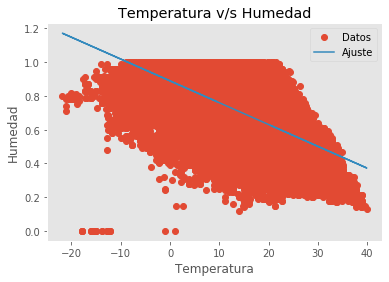

In [116]:
x = np.array(temp)
y = np.array(h)

n = len(x) #cantidad de datos

sumx = sum(x)
sumy = sum(y)
suma = 0 
for i in y:
    suma = suma + i**2
sumx2 = sum(x*x)
sumy2 = sum(y*y)
sumxy = sum(x*y)

mean_x = sumx/n
mean_y = sumy/n

m = (sumx*sumy - n*sumxy) / (sumx**2 - n*sumx2)
b = ((mean_y - m*mean_x))

print("Modelo de regresión lineal:")
print(" Y = "+ str(m) + 'X + ' + str(b))
print("Gráfica:")

plt.plot(x, y, 'o', label = 'Datos')
plt.plot(x, m*x +b, label = 'Ajuste')
plt.xlabel('Temperatura')
plt.ylabel('Humedad')
plt.title('Temperatura v/s Humedad')
plt.grid()
plt.legend()
plt.show()


In [117]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

def crear_modelo(data):
    datax = data[['Temperature (C)']]
    x_train = np.array(datax) 
    y_train = data['Humidity'].values 
    
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train) 
    y_pred = regr.predict(x_train)
    m = regr.coef_
    b = regr.intercept_
    mse = mean_squared_error(y_train, y_pred)

    print("Modelo de regresión lineal: ")
    print(" Y = "+ str(m[0]) + 'X + ' + str(b))
    print("Gráfica:")
    plt.plot(x_train,y_train,'o', label = 'Datos')
    plt.plot(x, m*x +b,  label = 'Ajuste')
    plt.xlabel('Temperatura')
    plt.ylabel('Humedad')
    plt.title('Temperatura v/s Humedad')
    plt.grid()
    plt.legend()
    plt.show()

    return (m,b,mse)


Modelo de regresión lineal: 
 Y = -0.012939114669679513X + 0.8892972609553139
Gráfica:


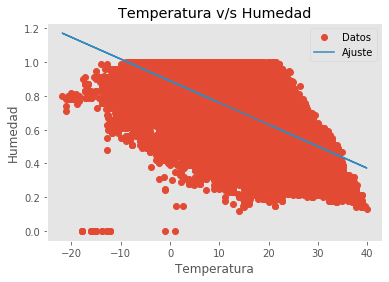

In [118]:
#creamos modelo
modelo_b = crear_modelo(we)

> c) Construya un intervalo de confianza del 95% para el coeficiente de posición, sin utilizar bootstrap. Construya el mismo intervalo con el método bootstrap utilizando tamaños $\frac{N}{2}$ y $N$ , ambos se deben realizar $2000$ veces. Compare los 3 intervalos y comente.

El primer intervalo de confianza a construir se basará en la teoría la cual dice que un intervalo de confianza de $100(1 − \alpha)\%$ para el parámetro $\alpha$ en la recta de regresión $\bar{y}=b+m \bar{x}$ viene dado con la siguiente distribución T.
$$
T=\frac{b-b_0}{S \sqrt{\sum_{i=1}^{n} x_{i}^{2} /\left(n S_{x x}\right)}}
$$

Donde $b$ corresponde al coeficiente de posición, $b_0$ al valor correspondiente de b en la muestra.
Donde $t_{α/2}$ es un valor de la distribución $t$ con $n − 2$ grados de libertad.

$$
S_{x x}=\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}, \quad S_{y y}=\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}, \quad S_{x y}=\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)
$$

Quedando el intervalo de confianza expresado de la siguiente manera:
$$
b-t_{\alpha / 2} \frac{s \sqrt{\sum_{i=1}^{n} x_{i}^{2}}}{\sqrt{n S_{x x}}}<b<b+t_{\alpha / 2} \frac{s \sqrt{\sum_{i=1}^{n} x_{i}^{2}}}{\sqrt{n S_{x x}}}$$

Mientras que $s$ viene definido del error cuadrático medio :
$$
s^2 = \frac{S_{y y}-m S_{x y}}{n-2}
$$

Donde $m$ es la pendiente que a su vez se puede escribir como $m=S_{x y} / S_{x x}$

In [119]:
import math 
from scipy.stats import t

x = np.array(temp)
y = np.array(h)
mean_x = np.mean(x)
mean_y = np.mean(y)

n=len(x)

#Se calcula los valores expuestos anteriormente
sxx = np.sum((x-mean_x) ** 2)
syy = np.sum((y-mean_y) ** 2)
sx = np.sum(x-mean_x)
sy = np.sum(y-mean_y)

#Calcular Sxy
sxy= 0
i=0
while(i<len(x)):
    mult = (x[i]- mean_x)*(y[i]- mean_y)
    sxy+=mult
    i+=1

#Se calcula s
s2= (syy - (m*sxy))/(n-2)
s = np.sqrt(s2)

#coeficiente de posición
b = modelo_b[1]

#Se calcula el intervalo alpha = 0,05
alpha = 0.05
t_alpha = t.ppf(1-alpha,df=n-2) #t_alpha con n-2 grados de libertad

suma_x2 = np.sum(x*x)
numerador = np.sqrt(suma_x2) *s
nsxx = n*sxx
denominador = np.sqrt(nsxx)


i_sup = b + (t_alpha * (numerador/denominador))
i_inf = b - (t_alpha * (numerador/denominador))

print("IC teórico para b: " + "["+str(i_inf)+","+str(i_sup)+"]")

IC teórico para b: [0.8880137102305306,0.8905808116800973]


Para la formulación del intervalo de confianza mediante el método de bootstrap, se utilizará la siguiente función para obtener una distribución correspondiente al coeficiente de posición.
$$
m=\frac{\sum x \sum y-n \sum(x y)}{\left(\sum x\right)^{2}-n \sum x^{2}} (1)
$$

$$
b=\bar{y}-m \bar{x} (2)
$$




In [120]:
#función para obtener valor de b, según teoria
def get_b(x,y,n):
    sumx = sum(x)
    sumy = sum(y)
    sumx2 = sum(x*x)
    sumxy = sum(x*y)
    
    mean_x = sumx/n
    mean_y = sum(y)/n
    m = (sumx*sumy - n*sumxy) / (sumx**2 - n*sumx2)
    return((mean_y - m*mean_x))

def bootstrap(poblacion, n):
    poblacion_b = []
    tiempo_inicial = time()
    for i in range(1000):
        #muestra de la población 
        muestra = poblacion.sample(n=n, replace=True)
        temp = muestra['Temperature (C)']
        h = muestra['Humidity']
        x = np.array(temp)
        y = np.array(h)
        b = get_b(x,y,n)
        poblacion_b.append(b)
    tiempo_final = time() 
    t_total = tiempo_final-tiempo_inicial
    print("Tiempo ejecución: " +str(t_total)+" seg")
    return poblacion_b

#obtenemos la población
new = we.iloc[:,[3,5]] #datos temperatura y humedad
#bootstrap para n 
coeficientes_n = bootstrap(new,n)
#bootstrap para n/2
n2 = n//2
coeficientes_nmedio = bootstrap(new,n2)


Tiempo ejecución: 133.67259907722473 seg
Tiempo ejecución: 58.020155906677246 seg


In [121]:
coeficientes_n.sort()
coeficientes_nmedio.sort()

lower95 = np.percentile(coeficientes_n,0.025)
upper95 = np.percentile(coeficientes_n,0.975)

lower95_2 = np.percentile(coeficientes_nmedio,0.025)
upper95_2 = np.percentile(coeficientes_nmedio,0.975)

i95 = [lower95, upper95]
i95_2 = [lower95_2, upper95_2]
print("Intervalo de confianza del 95% para muestra tamaño n : "+str(i95))
print("Intervalo de confianza del 95% para muestra tamaño n/2 : "+str(i95_2))

Intervalo de confianza del 95% para muestra tamaño n : [0.8870252490143021, 0.8875512968108816]
Intervalo de confianza del 95% para muestra tamaño n/2 : [0.8862159804061285, 0.8868076898269954]


Los intervalos son:
- Método teórico
    - [0.8880129794441468,0.890581542466481]
- Bootstrap 
    - Para $n$ : [0.8866298612714061, 0.8875688152131662]
    - Para $n/2$: [0.8859857473581328, 0.8869776740403789]
    
Se puede observar que en los tres casos el intervalo es coherente respecto al coeficiente de posición encontrado en nuestro modelo de regresión lineal.
En base al modelo téorico se puede decir que cubre un intervalo mayor, debido a que la interpretación y cálculo de este contempla los errores asociados a cada variable en cuestión.
En bootstrap al diferenciar el tamaño de la muestra de $n$ a $n/2$ se presenta por decirlo un intervalo corrido hacia la izquierda.
La distribución utilizada para estos calculos fue de t-student con (n-2) grados de libertad.


> d) Un amigo suyo que había trabajado previamente con este conjunto de datos le dijo que no existía relación lineal entre la temperatura y la humedad. Usted decide verificar esto aplicando un test de hipótesis con un 95% de significancia. 

*Hint: Tiene que ver con la pendiente*

Se  realizará un test de hipótesis para determinar si existe una relación entre las variables X(temperatura) e Y (humedad) o no, esto se traduce a trabajar con la hipótesis nula (No hay relación entre X e Y): $$ H_{0}: \hat{m} = 0$$ $$ H_{a}:\hat{m}\neq 0$$

Donde $\hat{m}$ corresponde a la pendiende del modelo $\hat{Y} = \hat{m}\cdot X + \hat{b} $. 

El valor crítico que determinará si la hipótesis nula se acepta o rechaza viene dado por una distribución de t student de (n-2) grados de libertad. Se obtendra un *p-valor* cuya interpretación correcta permitirá decir si la hipótesis nula se acepta o rechaza.

Debemos encontrar un intervalo de confianza para la pendiente y comprobar si pertenece el 0, si es así no existe una relación lineal.


El intervalo de confianza para la pendiente viene dada por la siguiente fórmula:

$$
m-t_{\alpha / 2} \frac{s}{\sqrt{S_{x x}}}<m<m+t_{\alpha / 2} \frac{s}{\sqrt{S_{x x}}}
$$


In [122]:
alpha = 0.05/2
t_alpha = t.ppf(1-alpha,df=n-2)

i_inf = m - t_alpha*(s/np.sqrt(sxx))
i_sup = m + t_alpha*(s/np.sqrt(sxx))

print("IC para m: " + "["+str(i_inf)+","+str(i_sup)+"]")

IC para m: [-0.013039179215109664,-0.01283905012424004]


Podemos ver del intervalo que no comprende el 0, es decir se rechaza $H_0$ con un 95% de certeza, comprobando que si existe una relación lineal entre las variables.

> e) Su amigo también le dijo que no existía una relación lineal entre la temperatura y la presión. Usted decide verificar esto aplicando un test de hipótesis con un 95% de significancia.

Creamos un nuevo modelo de regresión lineal con variable independiente $X$ la temperatura y la variable dependiente $Y$ la presión.



In [123]:
#creamos el modelo 
datax = we[['Temperature (C)']]
x_train = np.array(datax) 
y_train = we['Pressure (millibars)'].values 

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train) 
y_pred = regr.predict(x_train)
m_e = regr.coef_
b_e = regr.intercept_
mse_e = mean_squared_error(y_train, y_pred)
print("Ecuación lineal representativa del modelo")
print("Y = "+str(m_e[0])+"X " + "+" + str(b_e))

Ecuación lineal representativa del modelo
Y = -0.0667062139937273X +1004.0319396555178


Calculamos el intervalo de confianza de la pendiente, para determinar si la hipotesis se cumple.

$$ H_{0}: \hat{m} = 0$$ $$ H_{a}:\hat{m}\neq 0$$

In [124]:
#Calculamos el s y Sxx
x_1 = np.array(temp)
y_1 = np.array(p)

#medias
mean_x1 = np.mean(x_1)
mean_y1 = np.mean(y_1)

#Sxx y Syy
sxx_1 = np.sum((x_1-mean_x1) ** 2)
syy_1 = np.sum((y_1-mean_y1) ** 2)

#Sxy
sxy_1= 0
i=0
while(i<len(x_1)):
    mult = (x_1[i]- mean_x1)*(y_1[i]- mean_y1)
    sxy_1+=mult
    i+=1

#Se calcula s
s2_1= (syy_1 - (m*sxy_1))/(n-2)
s_1 = np.sqrt(s2_1)

#Calculamos el intervalo de confianza

alpha = 0.05/2
t_alpha1 = t.ppf(1-alpha,df=n-2)

i_inf = m_e[0] - t_alpha1*(s_1/np.sqrt(sxx_1))
i_sup = m_e[0] + t_alpha1*(s_1/np.sqrt(sxx_1))

print("IC para m_1: " + "["+str(i_inf)+","+str(i_sup)+"]")

IC para m_1: [-0.1439919553926548,0.010579527405200212]


Se puede observar del intervalo obtenido que la hipótesis $H_0$ se cumple, la pendiente puede tomar un valor nulo haciendo que no exista una relación entre las variables.

Se puede concluir que no existe una relación lineal entre Temperatura y presión, confirmando lo expuesto en el inciso a), donde el coeficiente de correlación entre las variables dió 0. 

> f) Calcule el [mse](https://es.wikipedia.org/wiki/Error_cuadr%C3%A1tico_medio) del modelo obtenido en b). Se le ha propuesto la opción de realizar 3 modelos utilizando 3 intervalos de temperatura: 

* $\left(-\infty,0\right]$
* $ \left(0,20\right]$
* $\left(20,+\infty \right]$

Error cuadrado medio parte (b): 0.022935223468210423
----------------------------------------------------
Modelo de regresión lineal: 
 Y = 0.004497601387175279X + 0.8779738315051768
Gráfica:


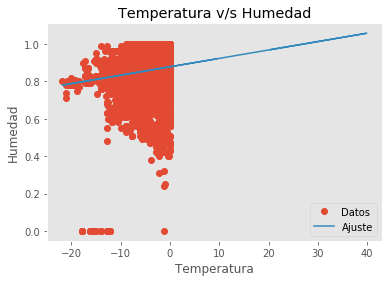

Modelo de regresión lineal: 
 Y = -0.008742574520792782X + 0.8746070979721229
Gráfica:


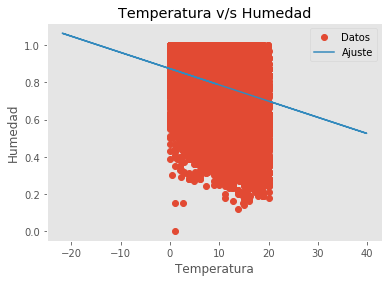

Modelo de regresión lineal: 
 Y = -0.024643012332182617X + 1.1304559844190265
Gráfica:


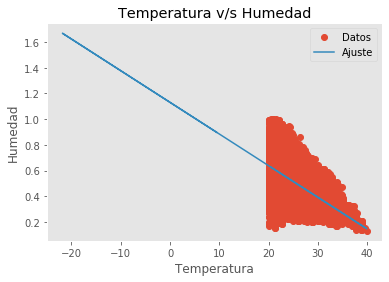

Error cuadrado medio*: 0.05203567104814688


In [125]:
#calculo de Mean squared error
print("Error cuadrado medio parte (b): "+ str(modelo_b[2]))

#Creamos data para cada intervalo
#para el intervalo (-inf,0]
data_i1 = we[we['Temperature (C)']<= 0] #data filtrada con el primer intervalo

#para el intervalo (0,20]
data_i2 = we[(we['Temperature (C)']> 0) & (we['Temperature (C)'] <= 20)] 

#para el intervalo (20,+inf]
data_i3 = we[we['Temperature (C)']> 20] 

print("----------------------------------------------------")
#calculamos nuevo mse (suma de los mse de los intervalos)
nuevo_mse = crear_modelo(data_i1)[2]+ crear_modelo(data_i2)[2]+ crear_modelo(data_i3)[2]
print ('Error cuadrado medio*: '+ str(nuevo_mse))

**Conclusión (f):** 
El valor de $MSE^*$ calculado como la suma de los $MSE$ de cada intervalo resulta ser 5,19% aprox.
Mientras que el valor del $MSE$ del modelo presentado en el inciso b con intervalo $ (-\infty, +\infty)$ es de 2,29%.

Esto debido que en el primer intervalo $(-\infty, 0]$ los datos obtienen una representación lineal con pendiente positiva (observar gráficas presentadas), la cual difiere al comportamiento de la totalidad de los datos haciendo esto de un error mayor.

## Bonus Section 

### B.1 NLP (+10)

Natural Language Processing (NLP) corresponde al análisis del lenguaje natural para realizar estudios acerca de: análisis de sentimiento, patrones del discurso en la voz para los asistentes (Ok google, Alexa, etc.), entre otros. Debido a su utilidad y complejidad, creó su propia area de inteligencia artificial. En esta sección usted trabajará con algunos aspectos básicos de NLP.

Dentro del análisis de patrones en el texto hay una técnica que se llama *Pos Tagging* (Parts of Speech tagging) que corresponde a la asignación de un *tag* a una palabra, estos tags son: sustantivo, verbo, adeverbio, etc. 

Trabajára con las relaciones "antes de" y "después de", es decir, utilizará alguna estructura de datos conveniente para almacenar las palabras que vienen antes de $X$ y las que vienen después de $X$.


> a) Determine las probabilidades del *tag* sucesor dado el *tag* de la palabra (Pos Tagging). Realice esto para los 3 tags de mayor frecuencia.

> b) Determine las probabilidades del *tag* antecesor dado el *tag* de la palabra (Pos Tagging). Realice esto para los mismos tags de e) y comente. ¿Hay alguna relación con lo trabajado en e)?

Puede trabajar con 1 solo texto en esta sub-sección, si lo prefiere.

----

* [POS Tagging en Python](https://www.nltk.org/book/ch05.html)
* [POS Tagging en R](https://smart-statistics.com/part-speech-tagging-r/)

### B.2 Redes Complejas ft. TLC (+10)

En el laboratorio 2 usted conoció un tipo de modelo para generar redes complejas de libre escala. En este laboratorio se le presenta otro tipo de modelo, un poco más básico, cuyo proceso de generación es el siguiente:

1. Se inicializa la red con una cantidad fija de nodos $N$ 
2. Entre cada par de nodos existe una probabilidad $\rho$ de colocar una arista entre cada par de nodos.

Este proceso puede hacerse tanto de forma dirigida como no dirigida. 

#### Teorema del Límite Central 

El teorema del límite central es uno de los postulados más importantes de estadística.

Sea $x_{1},x_{2},....,x_{n}$ una muestra aleatoria de tamaño $n$ IID extraidas de una distribución con valor esperado $\mu$ y varianza finita $\sigma^{2}$. Si calculamos la media muestral: 

$$ \bar{X}_{n} = \frac{\sum x_{i}}{n}$$

Y repetimos este proceso una gran cantidad de veces $(P)$ tendremos una distribución de las medias de las muestras (*Sample mean distribution*). El TLC establece que, si el número de repeticiones es lo suficientemente grande: 

$$ \bar{X} \sim N\left(\mu,\sqrt{\frac{\sigma^{2}}{n}}\right)$$ 

En esta sección comprobaremos el TLC utilizando el grafo descrito al inicio.

>a) Considerando la construcción del grafo ¿A qué distribución corresponde el proceso?

>b) En este caso nos interesa la distribución de **Grado Promedio**. En base a lo enunciado en el TLC identifique:

* Elementos de la muestra Aleatoria.
* La media de la distribución de grado promedio
* La varianza/std de la distribución de grado promedio.

Tanto para el caso **dirigido** como el **no dirigido**. En el caso dirigido se refiere a grado promedio de entrada y grado promedio de salida.


>c) Utilizando un $\rho$ fijo (a su elección, pero distinto de 0 y 1) genere la distribución de grado utilizando:

* 1000 grafos de 5 nodos
* 1000 grafos de 50 nodos
* 1000 grafos de 500 nodos
* 1000 grafos de 1000 nodos

**SOLO EN CASO NO DIRIGIDO**

Comparando los resultados obtenidos con su respuesta en b) ¿Es posible concluir que el teorema del límite central se cumple tanto para el grafo dirigido como no dirigido?


### Parte B.1)

Para ello, se trabajó con un solo libro (A Tale of Two Cities de Charles Dickens), en donde se identificarán los tags de cada palabra ahí incluida con su frecuencia y las relaciones de antecesor y sucesor entre dichas palabras, para así poder determinar la frecuencia de cada tag antecesor/sucesor para todos los tags específicos. Con dichos valores se calculará la probabilidad deseada.

En este trabajo se dejo toda puntuación dentro del corpus para permitir que el procesamiento de lenguaje (de `nltk`) se encargue de identificar adecuadamente la composición de las oraciones y así, los tags correspondientes. Los tags trabajados y que utiliza la librería `nltk` se pueden visualizar en el [siguiente sitio](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html), quedando la puntuación con su propio tag identificador.

In [10]:
import nltk
import collections


# Función para relacionar palabras con sus tags apropiados y contar frecuencia de cada tag
def tokenize(nombreArchivo):
    corpus = open('./'+nombreArchivo, 'r')
    frecuencias = dict()
    palabra_tokens = dict()
    for linea in corpus:
        # Extraer tags
        tokens = nltk.word_tokenize(linea)
        tags = nltk.pos_tag(tokens)
        # Palabra, tag obtenidos
        for pal, tag in tags:
            # Palabra nueva
            if pal not in palabra_tokens.keys():
                palabra_tokens[pal] = tag
            # Tag nuevo
            if tag not in frecuencias.keys():
                frecuencias[tag] = 1
            else:
                frecuencias[tag] += 1
    corpus.close()
    return palabra_tokens, frecuencias

# Función para identificar antecesores y sucesores de cada palabra
def relacionPalabras(nombreArchivo):
    corpus = open('./'+nombreArchivo, 'r')
    antes_de = dict()
    despues_de = dict()
    primeros=0
    anterior = ""
    ante_anterior = ""
    palabra = ""
    for linea in corpus:
        # Leer cada palabra
        tokens = nltk.word_tokenize(linea)
        for palabra in tokens:
            # Palabras nuevas
            if palabra not in antes_de:
                antes_de[palabra] = []
                despues_de[palabra] = []
            # Caso base, asignar primeros valores
            if (primeros==0):
                if ante_anterior != "":
                    primeros = 1
                    despues_de[ante_anterior].append(anterior)
                    antes_de[anterior].append(ante_anterior)
                    despues_de[anterior].append(palabra)
            # Caso general, asignar en palabra intermedia
            else:
                antes_de[anterior].append(ante_anterior)
                despues_de[anterior].append(palabra)
            # Actualizar palabras
            ante_anterior = anterior
            anterior = palabra
    # Caso final
    despues_de[ante_anterior].append(anterior)
    antes_de[anterior].append(ante_anterior)
    despues_de[anterior].append(palabra)
    antes_de[palabra].append(anterior)
    corpus.close()
    return antes_de, despues_de

# Función para realizar conteo de frecuencia de los tags antecesores/sucesores de cada tag
# diccionario viene en palabras, tokens incluye la relación palabra - tag
def contarTags(diccionario, tokens):
    tags_generales=dict()
    for key, values in diccionario.items():
        # Extraer tags de palabras
        tags = []
        for pal in values:
            tag = tokens[pal]
            tags.append(tag)
        # Contar total
        freq_tags = dict()
        freq_tags = {x: tags.count(x) for x in tags}
        # Si no hay tag en los anteriores
        if tag not in tags_generales.keys():
            tags_generales[tag] = freq_tags
        else:
            actual = tags_generales[tag]
            lista = [actual, freq_tags]
            # Unir y sumar diccionario con tags actuales y nuevos
            counter = collections.Counter() 
            for d in lista:  
                counter.update(d) 
            result = dict(counter) 
            tags_generales[tag] = result
    return(tags_generales)

# Función para calcular la probabilidad de los tags (antecesores o sucesores) de un tag específico
def probabilidadTag(diccionario, tagObjetivo):
    tagsActuales = diccionario[tagObjetivo]
    totalTags = 0
    probabilidades = dict()
    # Contar frecuencias
    for tagKey, frec in tagsActuales.items():
        totalTags += frec
        probabilidades[tagKey] = 0
    # Calculo probabilidad
    for tagKey, frec in tagsActuales.items():
        probabilidades[tagKey] = round(frec/totalTags, 5)
    return probabilidades

## Main ##
# Obtener palabras y tokens asociados y frecuencias de tokens
tokens, frecuencias = tokenize("corpus-libro.txt")
# Obtener relaciones antecesor, sucesor
antes, despues = relacionPalabras("corpus-libro.txt")
# Conteo de tags antecesores, sucesores
tagsAntes = contarTags(antes, tokens)
tagsDespues = contarTags(despues, tokens)
# Ordernar frecuencias
ordenado = sorted(frecuencias.items(), key=lambda x: x[1], reverse=True)
# Obtener top 3 tags
tag1 = ordenado[0][0]
tag2 = ordenado[1][0]
tag3 = ordenado[2][0]
# Gráfico frecuencias
df_tags = pd.DataFrame(ordenado, columns=["tag", "frecuencia"])
plt.bar(df_tags['tag'].head(10), df_tags.head(10)['frecuencia'].tolist(), align='center')
plt.title('Top 10 tags con mayores frecuencias')
plt.ylabel('Frecuencia')
plt.xlabel('Tags')
plt.show()

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/dmedel/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.7/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.7/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.7/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


### Parte B.1.a)
Así, los 3 tags con mayor frecuencia y que se estudiarán corresponden a: NN (sustantivos), IN (preposiciones) y DT (determinantes). Luego, se busca las probabilidades de los tags sucesores para cada uno de ellos.

In [11]:
# Cálculo de probabilidades
prob_despues1 = probabilidadTag(tagsDespues, tag1)
prob_despues2 = probabilidadTag(tagsDespues, tag2)
prob_despues3 = probabilidadTag(tagsDespues, tag3)
# Gráfico probabilidades antecesor dado tag 1
print("Probabilidades de tags sucesores dado tag", tag1, ": (de mayor a menor)")
df_despues1 = pd.DataFrame(prob_despues1.items(), columns=["tag", "probabilidad"])
df_despues1.sort_values(by=['probabilidad'], ascending=False, inplace=True)
display(df_despues1)
# Gráfico probabilidades antecesor dado tag 2
print("Probabilidades de tags sucesores dado tag", tag2, ": (de mayor a menor)")
df_despues2 = pd.DataFrame(prob_despues2.items(), columns=["tag", "probabilidad"])
df_despues2.sort_values(by=['probabilidad'], ascending=False, inplace=True)
display(df_despues2)
# Gráfico probabilidades antecesor dado tag 1
print("Probabilidades de tags sucesores dado tag", tag3, ": (de mayor a menor)")
df_despues3 = pd.DataFrame(prob_despues3.items(), columns=["tag", "probabilidad"])
df_despues3.sort_values(by=['probabilidad'], ascending=False, inplace=True)
display(df_despues3)

NameError: name 'tagsDespues' is not defined

### Parte B.1.b)
Así, se finaliza calculando las probabilidades de los antecesores de los tags trabajados.

In [ ]:
# Cálculo de probabilidades
prob_antes1 = probabilidadTag(tagsAntes, tag1)
prob_antes2 = probabilidadTag(tagsAntes, tag2)
prob_antes3 = probabilidadTag(tagsAntes, tag3)
# Gráfico probabilidades antecesor dado tag 1
print("Probabilidades de tags antecesores dado tag", tag1, ": (de mayor a menor)")
df_antes1 = pd.DataFrame(prob_antes1.items(), columns=["tag", "probabilidad"])
df_antes1.sort_values(by=['probabilidad'], ascending=False, inplace=True)
display(df_antes1)
# Gráfico probabilidades antecesor dado tag 2
print("Probabilidades de tags antecesores dado tag", tag2, ": (de mayor a menor)")
df_antes2 = pd.DataFrame(prob_antes2.items(), columns=["tag", "probabilidad"])
df_antes2.sort_values(by=['probabilidad'], ascending=False, inplace=True)
display(df_antes2)
# Gráfico probabilidades antecesor dado tag 3
print("Probabilidades de tags antecesores dado tag", tag3, ": (de mayor a menor)")
df_antes3 = pd.DataFrame(prob_antes3.items(), columns=["tag", "probabilidad"])
df_antes3.sort_values(by=['probabilidad'], ascending=False, inplace=True)
display(df_antes3)

Finalmente, se evidencia que efectivamente hay una relación con la probabilidad de los sucesores y de los antecesores, ya que al ser más probable que un tag sea sucesor de otro, se espera que sea recíproco, es decir, que entre los antecesores más probables del segundo tag sea el primero (y viceversa). Mirando las tablas se puede ver que los primeros sucesores y antecesores son los mismos tags y, salvo algunas excepciones, las posiciones de dichos tags en las tablas corresponden a dicha tendencia. Resulta importante destacar que dicha relación entre antecesores y sucesores no es equivalente (de igual probabilidad), ya que las probabilidades dependen en un mayor grado de la frecuencia del tag en cuestión y de los otros posibles tags que lo rodean.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ En esta ocasión se podrán realizar consultas hasta el 4 de noviembre a las 15:00h.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.6.1
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)